In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#PTV graphs
class PTV_plots:

    def __init__(self, csv_path, time_limit =100000):

        self.ptv_data = pd.read_excel(csv_path, skiprows = 1) #skiprows to select correct data
        self.time = self.ptv_data.iloc[:, 0] * 60  #convert frame into seconds 
        self.velocity = self.ptv_data.iloc[:, 1] * 1000000 #convert m/s into µ/s
        
        #filter to include values only before the time limit
        self.filtered_indices = self.time <= time_limit
        self.filtered_time = self.time[self.filtered_indices]
        self.filtered_velocity = self.velocity[self.filtered_indices]

        #find time of max velocity
        max_velocity_index = self.filtered_velocity.idxmax()
        self.max_velocity_time = self.filtered_time.iloc[max_velocity_index]
        self.max_vec = self.filtered_velocity.iloc[max_velocity_index]


    def plot_velocity_vs_time(self):

        plt.figure(figsize=(12, 6))
        plt.plot(self.filtered_time, self.filtered_velocity)
        plt.xlabel('Time / s')
        plt.ylabel(r'Average Velocity with PTV / $\mathrm{\mu m\,s^{-1}}$ ')
        plt.grid(True)
        plt.show()

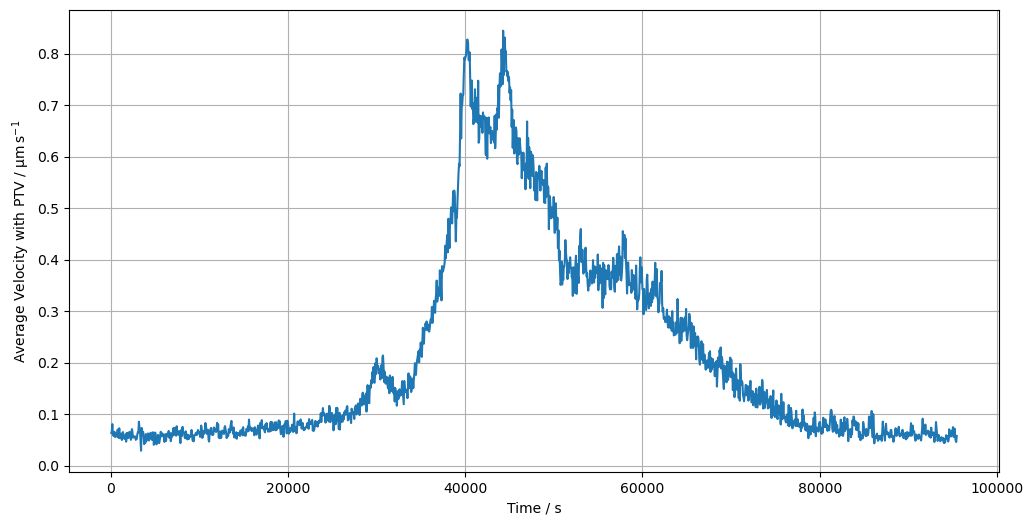

44280


In [3]:
ptv_df = PTV_plots('/Users/kavi/project_data/PTV_Data/vel_by_frame (0.6 gL).xlsx', 1000000)
ptv_df.plot_velocity_vs_time()
print (ptv_df.max_velocity_time)

In [4]:
class PIV_plots:

    def __init__(self, csv_path, time_limit = 1000000, deltat = 120):

        self.piv_data = pd.read_csv(csv_path)
        self.time = self.piv_data.index * deltat
        self.velocity = (self.piv_data["vec"] * 180 ) / 120
        self.x_dis = self.piv_data["vecx"]
        self.y_dis = self.piv_data["vecy"]
        self.corr = self.piv_data["rij"]
        
        self.filtered_indices = self.time <= time_limit
        self.filtered_time = self.time[self.filtered_indices]
        self.filtered_velocity = self.velocity[self.filtered_indices]
        self.filtered_corr = self.corr[self.filtered_indices]

        #minimum velocities 
        max_velocity_index = self.filtered_velocity.idxmax()
        self.max_velocity_time = self.filtered_time[max_velocity_index]
        self.max_vec = self.filtered_velocity[max_velocity_index]

        #minimum velocities 
        min_velocity_index = self.filtered_velocity.idxmin()
        self.min_velocity_time = self.filtered_time[min_velocity_index]
        self.min_vec = self.filtered_velocity[min_velocity_index]       


    def plot_velocity_vs_time(self):

        plt.figure(figsize=(12, 6))
        plt.plot(self.filtered_time, self.filtered_velocity)
        plt.xlabel('Time / s')
        plt.ylabel(r'Average Velocity with PIV / $\mathrm{\mu m\,s^{-1}}$ ')
        plt.grid(True)
        plt.show()


    def plot_correlation_vs_time(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.filtered_time, self.filtered_corr)
        plt.xlabel('Time / s')
        plt.ylabel('Correlation Coefficient')
        plt.grid(True)
        plt.show()
    
    def calculate_corr_extrema_times(self):
        max_corr_index = self.corr.idxmax()
        self.max_corr_time = self.time[max_corr_index]
        self.max_corr = self.corr[max_corr_index]

        min_corr_index = self.corr.idxmin()
        self.min_corr_time = self.time[min_corr_index]
        self.min_corr = self.corr[min_corr_index]

        return self.min_corr_time, self.max_corr_time

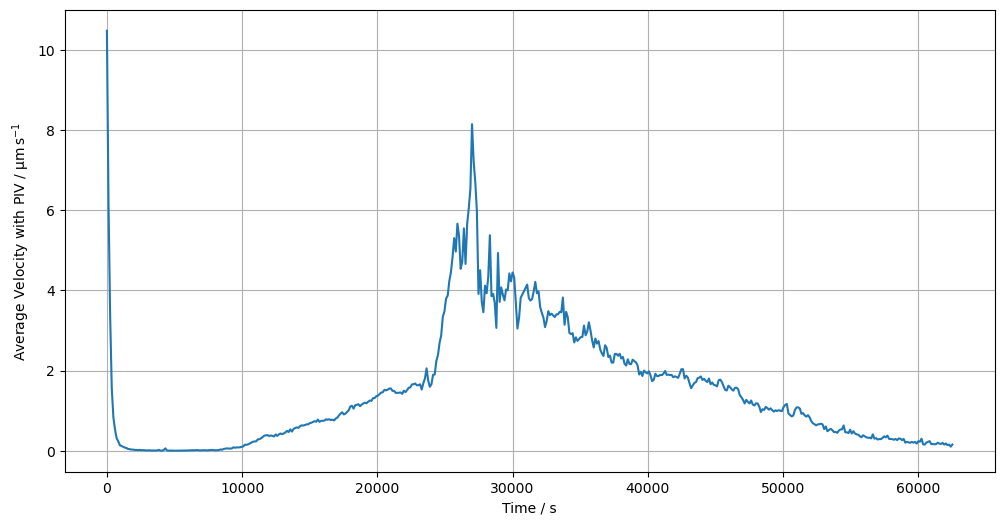

0


In [5]:
# Usage example
piv_obj = PIV_plots('/Users/kavi/project_data/concentrations/0.6_1min.csv')
piv_obj.plot_velocity_vs_time()
print (piv_obj.max_velocity_time)

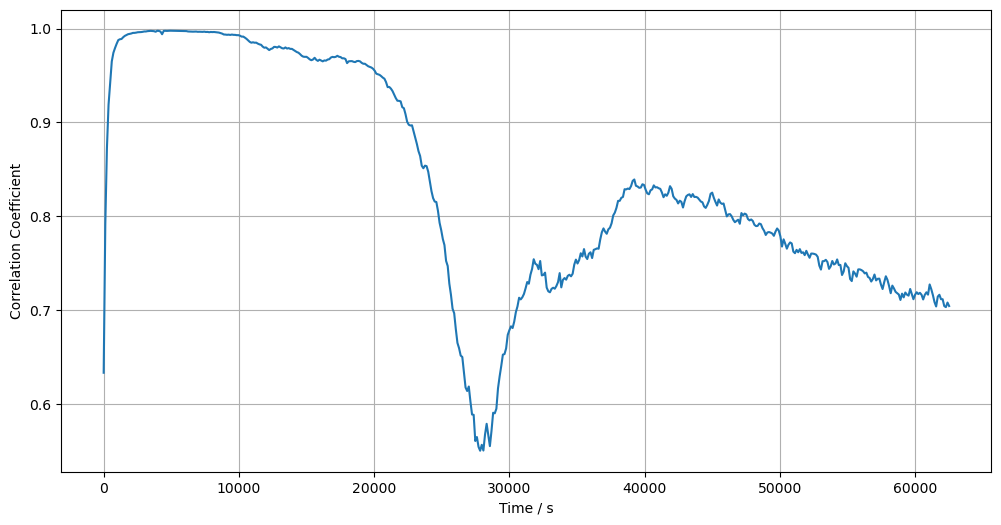

In [6]:
piv_obj.plot_correlation_vs_time()

In [7]:
piv_obj.calculate_corr_extrema_times()

(27840, 4920)

In [8]:
#load dataset 
collapse_df = pd.read_csv("/Users/kavi/project_data/collapse_data.csv")
collapse_df

,concentration,tPTV,tPIV,ln tPTV,ln tPIV,(tPTV - tPIV)
0,0.3,0.40,0.28,-0.92,-1.26,0.12
1,0.4,1.93,1.12,0.66,0.11,0.82
2,0.5,4.23,3.77,1.44,1.33,0.47
3,0.6,12.30,8.63,2.51,2.16,3.67


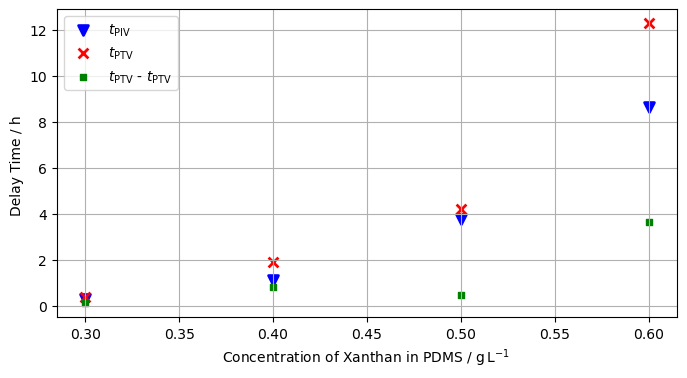

In [9]:
#plot xanthan concentration versus delay time for collapse 
plt.figure(figsize=(8, 4))

plt.scatter(collapse_df["concentration"], collapse_df["tPIV"], 
            c ="blue",
            linewidths = 2,
            marker ="v",
            s = 50,
            label=r'$t_{\mathrm{PIV}}$')

plt.scatter(collapse_df["concentration"], collapse_df["tPTV"], 
            c ="red",
            linewidths = 2,
            marker ="x",
            s = 50,
            label=r'$t_{\mathrm{PTV}}$')
            
plt.scatter(collapse_df["concentration"], collapse_df["(tPTV - tPIV)"], 
            c ="green",
            linewidths = 1,
            marker ="s",
            s = 25,
            label=r'$t_{\mathrm{PTV}}$ - $t_{\mathrm{PTV}}$')

plt.grid(True, which='major')
plt.legend()

plt.xlabel(r"Concentration of Xanthan in PDMS / $\mathrm{g\,L^{-1}}$ ")
plt.ylabel("Delay Time / h ")

plt.show()


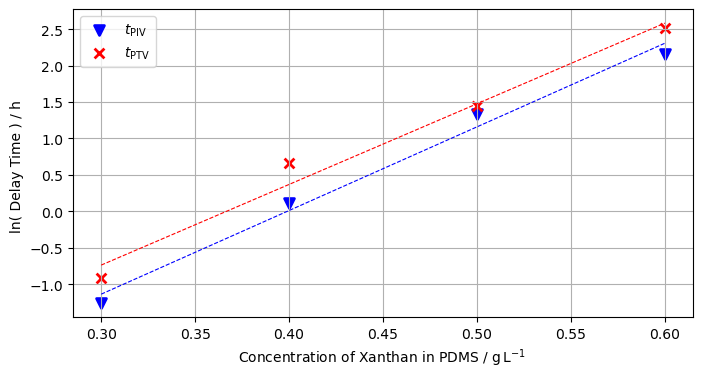

In [10]:
#plot xanthan concentration versus delay time for collapse 
plt.figure(figsize=(8, 4))

plt.scatter(collapse_df["concentration"], collapse_df["ln tPIV"], 
            c ="blue",
            linewidths = 2,
            marker ="v",
            s = 50,
            label=r'$t_{\mathrm{PIV}}$')

plt.scatter(collapse_df["concentration"], collapse_df["ln tPTV"], 
            c ="red",
            linewidths = 2,
            marker ="x",
            s = 50,
            label=r'$t_{\mathrm{PTV}}$')
            
# add lines of best fit
p1 = np.polyfit(collapse_df["concentration"], collapse_df["ln tPIV"], 1)
p2 = np.polyfit(collapse_df["concentration"], collapse_df["ln tPTV"], 1)

plt.plot(collapse_df["concentration"], np.polyval(p1, collapse_df["concentration"]), 'b--', linewidth=0.8)
plt.plot(collapse_df["concentration"], np.polyval(p2, collapse_df["concentration"]), 'r--', linewidth=0.8)

plt.grid(True, which='major')
plt.legend()

plt.xlabel(r"Concentration of Xanthan in PDMS / $\mathrm{g\,L^{-1}}$ ")
plt.ylabel("ln( Delay Time ) / h ")

plt.show()

In [11]:
print("Linear regression parameters for PIV: slope = {:.2f}, intercept = {:.2f}".format(p1[0], p1[1]))
print("Linear regression parameters for PTV: slope = {:.2f}, intercept = {:.2f}".format(p2[0], p2[1]))

Linear regression parameters for PIV: slope = 11.48, intercept = -4.58
Linear regression parameters for PTV: slope = 11.07, intercept = -4.06


In [12]:
print("PIV: y = {:.2f}x + {:.2f}".format(p1[0], p1[1]))
print("PTV: y = {:.2f}x + {:.2f}".format(p2[0], p2[1]))

PIV: y = 11.48x + -4.58
PTV: y = 11.07x + -4.06


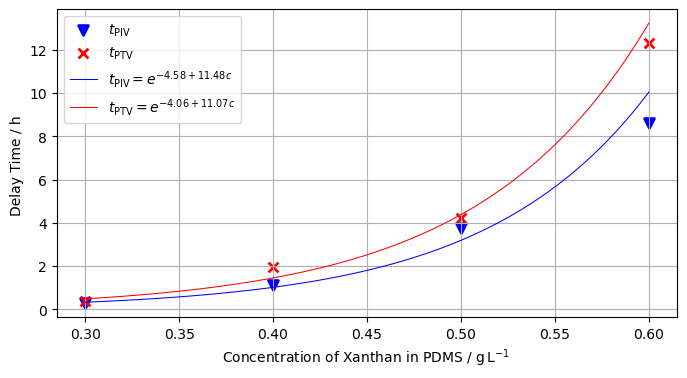

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.scatter(collapse_df["concentration"], collapse_df["tPIV"], 
            c ="blue",
            linewidths = 2,
            marker ="v",
            s = 50,
            label=r'$t_{\mathrm{PIV}}$')

plt.scatter(collapse_df["concentration"], collapse_df["tPTV"], 
            c ="red",
            linewidths = 2,
            marker ="x",
            s = 50,
            label=r'$t_{\mathrm{PTV}}$')

# add the exponential lines
x_range = np.linspace(min(collapse_df["concentration"]), max(collapse_df["concentration"]), 100)
y_exp_piv = np.exp(p1[1] + p1[0] * x_range)
y_exp_ptv = np.exp(p2[1] + p2[0] * x_range)
plt.plot(x_range, y_exp_piv, 'b-', linewidth=0.75, label=r'$t_{\mathrm{PIV}} = e^{%.2f + %.2fc}$' % (p1[1], p1[0]))
plt.plot(x_range, y_exp_ptv, 'r-', linewidth=0.75, label=r'$t_{\mathrm{PTV}} = e^{%.2f + %.2fc}$' % (p2[1], p2[0]))

plt.grid(True, which='major')
plt.legend()

plt.xlabel(r"Concentration of Xanthan in PDMS / $\mathrm{g\,L^{-1}}$ ")
plt.ylabel("Delay Time / h ")

plt.show()
